Error fetching price series for ALCH
Error fetching price series for BSV
Error fetching price series for AXS
Error fetching price series for BAL
Error fetching price series for BAND
Error fetching price series for AR
Error fetching price series for APT
Error fetching price series for BAT
Error fetching price series for CORE
Error fetching price series for ETHW
Error fetching price series for FARTCOIN
Error fetching price series for IP
Error fetching price series for MEMEFI
Error fetching price series for SPX
Error fetching price series for XCN
Error fetching price series for XDC


/var/folders/t0/0sfk09g52t9gwh_tw8r6tq7m0000gn/T/ipykernel_12772/185207322.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  underlying_returns = underlying.pct_change()


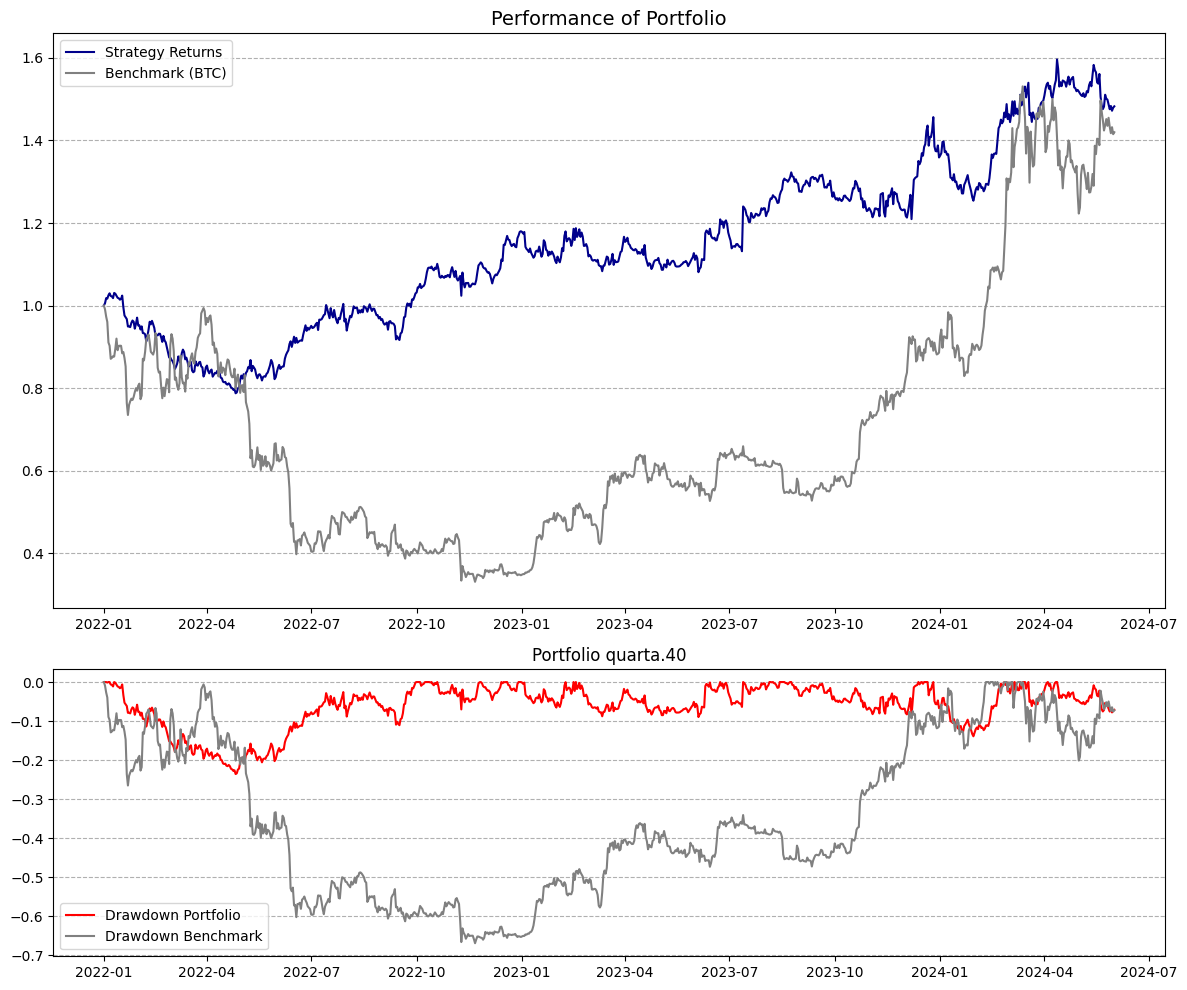

(<Figure size 1200x1000 with 2 Axes>,
 (<Axes: title={'center': 'Performance of Portfolio'}>,
  <Axes: title={'center': 'Portfolio quarta.40'}>))

In [4]:
from analysis.utils import get_env

from analysis.backtest import backtest_portfolio
from analysis.plot import plot_backtest_results
from analysis.price import get_price_data
from analysis.utils import rebase
from api import get_portfolio_historical_weights

UNRAVEL_API_KEY = get_env("UNRAVEL_API_KEY")
portfolio = "quarta.40"
start_date = "2022-01-01"
end_date = "2024-06-01"
benchmark_ticker = "BTC"


portfolio_historical_weights = get_portfolio_historical_weights(
    portfolio,
    UNRAVEL_API_KEY,
    start_date,
    end_date,
    smoothing=None,  # This will use the default smoothing please see catalog for default values for each portfolio (https://unravel.finance/home/api/catalog/portfolios)
)

underlying = get_price_data(portfolio_historical_weights.columns, start_date, end_date)

if benchmark_ticker in underlying.columns:
    benchmark = underlying[benchmark_ticker]
else:
    benchmark = get_price_data(
        [benchmark_ticker],
        start_date,
        end_date,
    )[benchmark_ticker]

underlying_returns = underlying.pct_change()
portfolio_returns, _ = backtest_portfolio(
    weights=portfolio_historical_weights[underlying.columns],
    underlying=underlying_returns,
    transaction_cost=0.001,
    lag=0,
)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
plot_backtest_results(
    rebase(portfolio_cumulative_returns), rebase(benchmark), portfolio
)